<a href="https://colab.research.google.com/github/Raj-Gopika/ML_Models/blob/main/KNN_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading and Inspecting data

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True, return_X_y = True)
iris_x , iris_y = iris


In [3]:
iris_x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
iris_y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
iris_x.shape

(150, 4)

## Data Visualization using seaborn

<Axes: xlabel='target', ylabel='count'>

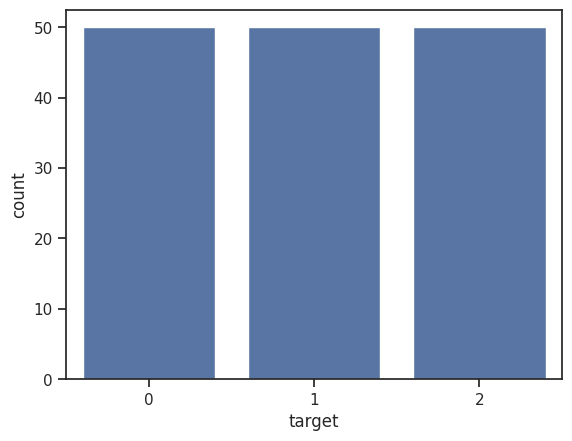

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style = 'ticks')

iris_data = pd.concat([iris_x, iris_y] , axis =1)

sns.countplot(data = iris_data , x = 'target')


In [ ]:
iris_data['target'].value_counts(normalize = True)

,proportion
target,
0,0.333333
1,0.333333
2,0.333333


## Predictors and Class

Sepal Length, Sepal width, Petal length, Petal width

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='target', ylabel='petal width (cm)'>

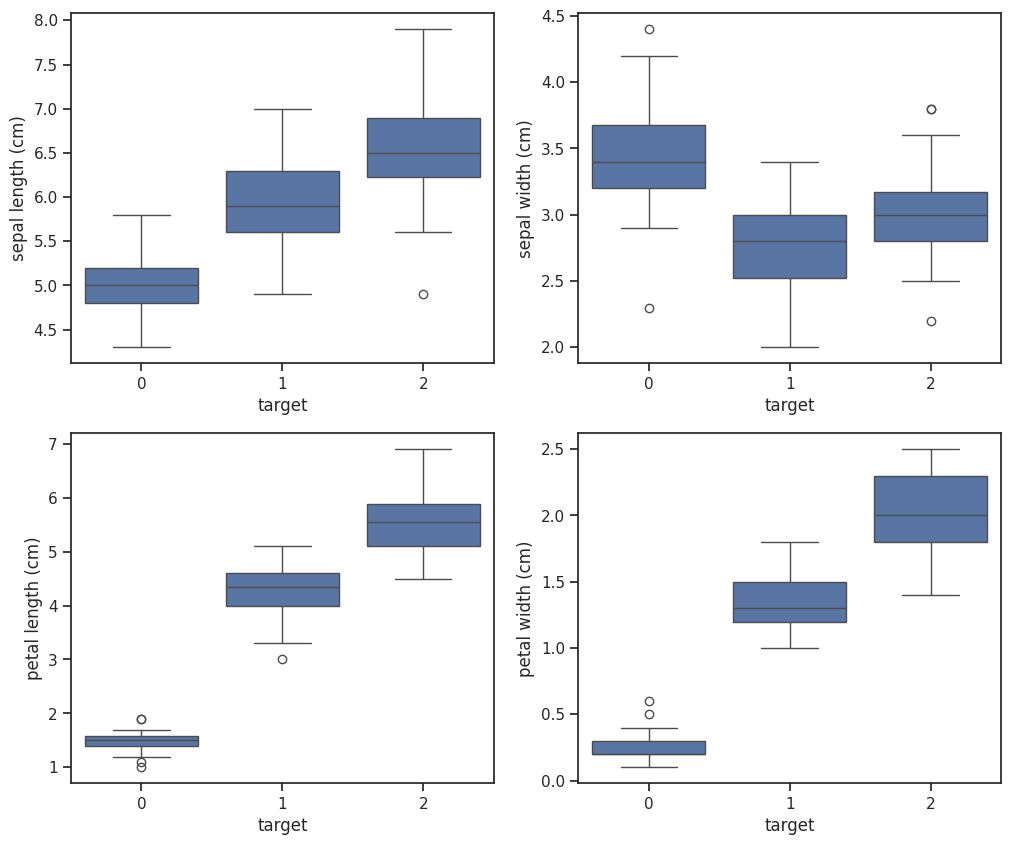

In [5]:
fig, axis = plt.subplots(2,2 , figsize= (12,10))

sns.boxplot(data = iris_data, x = 'target', y = 'sepal length (cm)', ax = axis[0,0])

sns.boxplot(data = iris_data, x = 'target', y = 'sepal width (cm)', ax = axis[0,1])

sns.boxplot(data = iris_data, x = 'target', y = 'petal length (cm)', ax = axis[1,0])

sns.boxplot(data = iris_data, x = 'target', y = 'petal width (cm)', ax = axis[1,1])

## Training the model

In [ ]:
iris_x.shape, iris_y.shape

((150, 4), (150,))

Total 150 rows : splitting the first 75% towards training and the rest 25% towards testing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [10]:
x_train, x_test, y_train, y_test = train_test_split(iris_x, iris_y, test_size = .25, random_state=0)

x_train.shape, y_train.shape, x_test.shape, y_test.shape



((112, 4), (112,), (38, 4), (38,))

In [12]:
knnc = KNeighborsClassifier(3)

In [15]:
knnc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
knnc.score(x_test, y_test)

0.9736842105263158

In [17]:
knnc.score(x_train, y_train)

0.9642857142857143

In [18]:
knnc = KNeighborsClassifier(7)
knnc.fit(x_train, y_train)
print(knnc.score(x_test, y_test))
print(knnc.score(x_train, y_train))

0.9736842105263158
0.9732142857142857


In [19]:
iris_y.head(10).to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
knnc.predict(iris_x.head(10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Drilling Down Evaluation

In [1]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

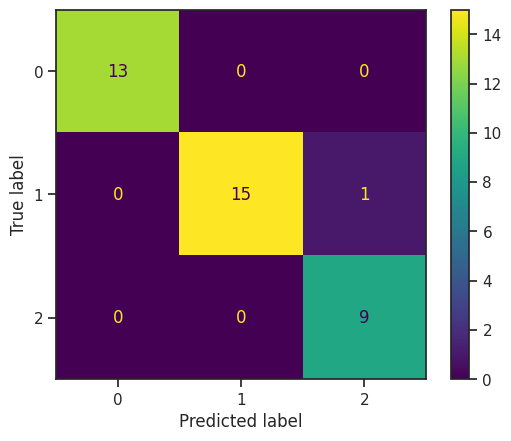

In [22]:
cm = confusion_matrix(y_test, knnc.predict(x_test))

ConfusionMatrixDisplay(confusion_matrix = cm).plot()

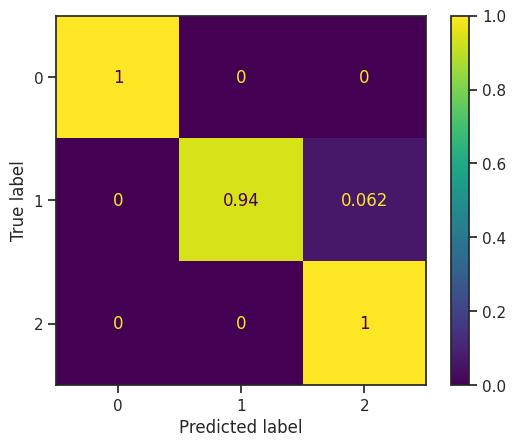

In [23]:
cm = confusion_matrix(y_test, knnc.predict(x_test), normalize = 'true')

ConfusionMatrixDisplay(confusion_matrix= cm).plot()

In [24]:
accuracy_score(y_test, knnc.predict(x_test))

0.9736842105263158

In [25]:
balanced_accuracy_score(y_test, knnc.predict(x_test))

0.9791666666666666